In [1]:
from google.colab import drive 
drive.mount('/content/drive/')
!ls


Mounted at /content/drive/
/content
drive  sample_data


In [2]:
import os
os.chdir("/content/drive/MyDrive/yapay_zeka")


 decision_tree.log		   kmeans_ornek.ipynb
 decision_tree.png		  'Makine Öğrenmesi_AEY.ipynb'
 DecisionTreeVisualization.ipynb   TumorVerisi.xlsx
 download.xls			   ugulama1.ipynb
 downloady.xls


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_excel(r'TumorVerisi.xlsx')
df.head()

,Hasta ID,Tümör Yarıçapı (mm),Tümör Hacmi (mm3),Bağ Dokusu (Yok = 0; Var = 1),Diferansiasyon Hızı (mm/yıl),Etiket (İyi Huylu = 0; Kötü Huylu = 1)
0,1,102.0,4.441814e+06,1,0.229958,1
1,2,79.0,2.063676e+06,0,12.757216,1
2,3,8.0,2.143569e+03,1,8.317290,0
3,4,46.0,4.074118e+05,1,6.818729,1
4,5,18.0,2.441131e+04,1,2.802301,0


In [11]:
C=df['Tümör Yarıçapı (mm)']
H=df['Tümör Hacmi (mm3)']
Hız=df['Diferansiasyon Hızı (mm/yıl)']

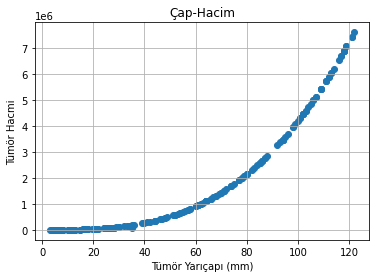

In [10]:
plt.scatter(C,H)
plt.xlabel("Tümör Yarıçapı (mm)")
plt.ylabel("Tümör Hacmi")
plt.title("Çap-Hacim")
plt.grid(True)
plt.show()

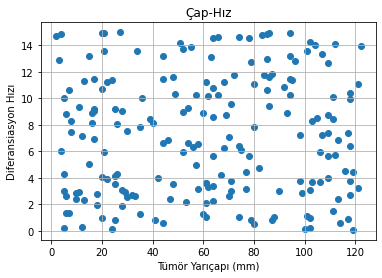

In [12]:
plt.scatter(C,Hız)
plt.xlabel("Tümör Yarıçapı (mm)")
plt.ylabel("Diferansiasyon Hızı")
plt.title("Çap-Hız")
plt.grid(True)
plt.show()

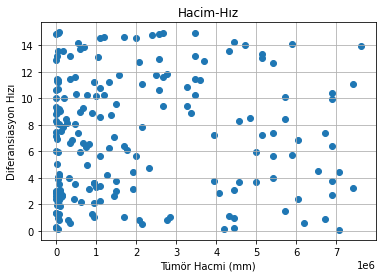

In [13]:
plt.scatter(H,Hız)
plt.xlabel("Tümör Hacmi (mm)")
plt.ylabel("Diferansiasyon Hızı")
plt.title("Hacim-Hız")
plt.grid(True)
plt.show()

In [15]:
y = df["Etiket (İyi Huylu = 0; Kötü Huylu = 1)"].values 
x_data = df.drop(["Etiket (İyi Huylu = 0; Kötü Huylu = 1)"],axis=1) 

In [45]:

mean_value=x_data['Tümör Yarıçapı (mm)'].mean()
  
x_data['Tümör Yarıçapı (mm)'].fillna(value=mean_value, inplace=True)

In [46]:
mean_value=x_data['Tümör Hacmi (mm3)'].mean()
  
x_data['Tümör Hacmi (mm3)'].fillna(value=mean_value, inplace=True)

In [47]:
# normalizasyon
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [48]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=1)

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1) 
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluk: {} ".format(rf.score(x_test,y_test)))

Rastgele Orman Modeli Test Doğruluk: 0.9666666666666667 


In [51]:
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 2
knn = KNeighborsClassifier(n_neighbors = komsu_sayisi) 
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print(" {} En Yakın Komşu Modeli Test Doğruluk: {} ".format(komsu_sayisi,knn.score(x_test,y_test)))

 2 En Yakın Komşu Modeli Test Doğruluk: 0.9666666666666667 


In [54]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)
con_m=confusion_matrix(y_test,y_pred)
con_m

array([[16,  0],
       [ 1, 13]])